In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Python version: 3.6.2 |Anaconda, Inc.| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.20.3
matplotlib version: 2.0.2
NumPy version: 1.13.1
SciPy version: 0.19.1
IPython version: 6.1.0
scikit-learn version: 0.19.0
-------------------------
gender_submission.csv
test.csv
train.csv



In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [3]:
#import data from file: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
data_raw = pd.read_csv('../input/train.csv')


#a dataset should be broken into 3 splits: train, test, and (final) validation
#the test file provided is the validation file for competition submission
#we will split the train set into train and test data in future sections
data_val  = pd.read_csv('../input/test.csv')


#to play with our data we'll create a copy
#remember python assignment or equal passes by reference vs values, so we use the copy function: https://stackoverflow.com/questions/46327494/python-pandas-dataframe-copydeep-false-vs-copydeep-true-vs
data1 = data_raw.copy(deep = True)

#however passing by reference is convenient, because we can clean both datasets at once
data_cleaner = [data1, data_val]


#preview data
print (data_raw.info()) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
#data_raw.head() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html
#data_raw.tail() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html
data_raw.sample(10) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.2500,NaN,Q
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C
294,295,0,3,"Mineff, Mr. Ivan",male,24.0,0,0,349233,7.8958,NaN,S
446,447,1,2,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S
400,401,1,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.9250,NaN,S
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.0000,F2,S
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S
602,603,0,1,"Harrington, Mr. Charles H",male,NaN,0,0,113796,42.4000,NaN,S


In [4]:
print('Train columns with null values:\n', data1.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Rouse, Mr. Richard Henry",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
###COMPLETING: complete or delete missing values in train and test/validation dataset
for dataset in data_cleaner:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
#delete the cabin feature/column and others previously stated to exclude in train dataset
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [6]:
###CREATE: Feature Engineering for train and test/validation dataset
for dataset in data_cleaner:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


    #Continuous variable bins; qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
    #Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)


    
#cleanup rare title names
#print(data1['Title'].value_counts())
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (data1['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print("-"*10)


#preview data again
data1.info()
data_val.info()
data1.sample(10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
651,1,2,"Doling, Miss. Elsie",female,18.0,0,1,23.0000,S,2,0,Miss,"(14.454, 31.0]","(16.0, 32.0]"
380,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,227.5250,C,1,1,Miss,"(31.0, 512.329]","(32.0, 48.0]"
440,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.0,1,1,26.2500,S,3,0,Mrs,"(14.454, 31.0]","(32.0, 48.0]"
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,69.5500,S,11,0,Miss,"(31.0, 512.329]","(16.0, 32.0]"
464,0,3,"Maisner, Mr. Simon",male,28.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
369,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,69.3000,C,1,1,Misc,"(31.0, 512.329]","(16.0, 32.0]"
709,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,28.0,1,1,15.2458,C,3,0,Master,"(14.454, 31.0]","(16.0, 32.0]"
814,0,3,"Tomlin, Mr. Ernest Portage",male,30.5,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
699,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,7.6500,S,1,1,Mr,"(-0.001, 7.91]","(32.0, 48.0]"
825,0,3,"Flynn, Mr. John",male,28.0,0,0,6.9500,Q,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"


In [7]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')


#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')
# get_dummiesを使うと、onehoencodingがされるのよ。
# 


data1_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [8]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("-"*10)
print (data_val.info())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non-null catego

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Rouse, Mr. Richard Henry",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
#split train and test data with function defaults
#random_state -> seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
# cross-validation用に教師データを分ける
# http://docs.pyq.jp/python/machine_learning/tips/train_test_split.html
# train_test_split(特徴行列, 目的変数, 乱数)
# y：今回だとsurviveが格納される
# x：特徴量のデータ
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state=0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target], random_state=0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state=0)

print("Data1 Shape: {}".format(data1.shape))
print("Data1 Shape: {}".format(train1_x.shape))
print("Data1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()


Data1 Shape: (891, 19)
Data1 Shape: (668, 8)
Data1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


In [10]:
#Discrete Variable Correlation by Survival using
#group by aka pivot table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
# descreteな変数について、目的変数との相関を見る

for x in data1_x:
   #  print(data1[[x, Target[0]]])  # この形で書くと、指定した二つのカラムを出力できる
    if data1[x].dtype != 'float64':
        print('Survival Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        # print(data1[[x, Target[0]]].groupby(x).mean())
        # as_indexをFalseにしないと、インデックス番号を書いてくれない.
        # xはgroupingのkeyを表している。これを元に、グルーピングを行なって、それに対してmeanを適用してるよ。

    

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1 

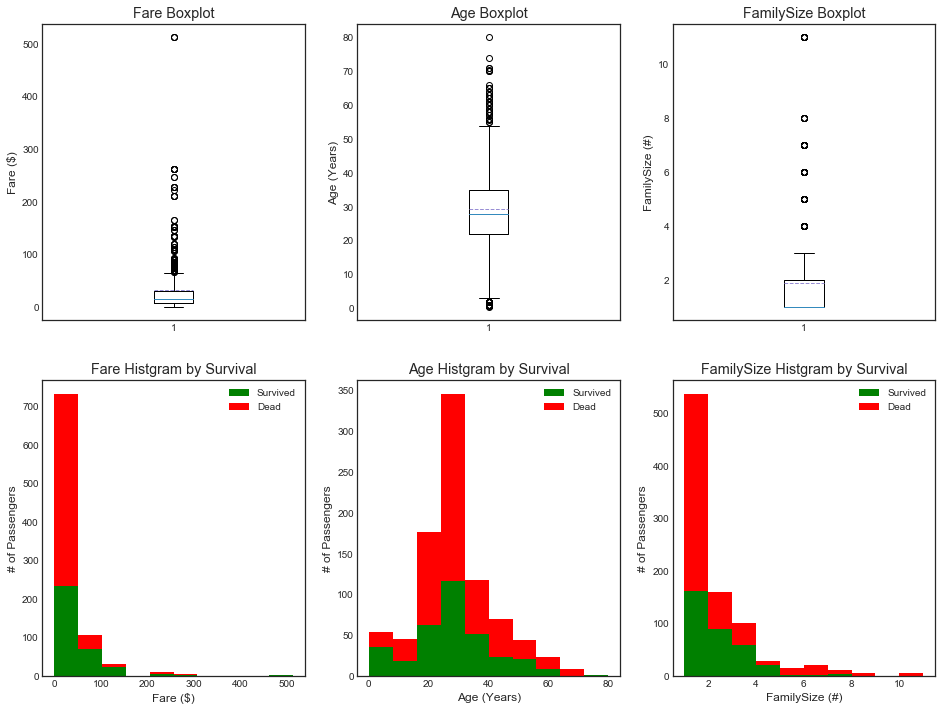

In [11]:
# graphを書く
# 最重要 http://ailaby.com/matplotlib_fig/
#  figureメソッドを作ってる
# http://ch.nicovideo.jp/keoro-ash/blomaga/ar867749
# http://nihaoshijie.hatenadiary.jp/entry/2018/01/15/181235
# 1変数に引数として渡す時は、二つをまとめないとそりゃいけないよね
# print([data1[data1['Survived' ]== 1]['Fare'], data1[data1['Survived'] == 0]['Fare']])
# print(data1[data1['Survived' ]== 1]['Fare'], data1[data1['Survived'] == 0]['Fare'])

plt.figure(figsize = [16, 12])
# subplot()はaxesを作成してくれるそうで
# subplot(行数, 列数, プロット番号)
plt.subplot(231)  # 2行3列に分割した画面のうち、1つめのグラフを指定し、以降入力する?
plt.boxplot(x = data1['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232) 
plt.boxplot(x = data1['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233) 
plt.boxplot(x = data1['FamilySize'], showmeans = True, meanline = True)
plt.title('FamilySize Boxplot')
plt.ylabel('FamilySize (#)')

plt.subplot(234) 
plt.hist(x = [data1[data1['Survived' ]== 1]['Fare'], data1[data1['Survived'] == 0]['Fare']]
         , stacked = True
         , color = ['g', 'r']
         , label = ['Survived', 'Dead'])
plt.title('Fare Histgram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()  #　凡例をつける

plt.subplot(235) 
plt.hist(x = [data1[data1['Survived' ]== 1]['Age'], data1[data1['Survived'] == 0]['Age']]
         , stacked = True
         , color = ['g', 'r']
         , label = ['Survived', 'Dead'])
plt.title('Age Histgram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()  #　凡例をつける

plt.subplot(236) 
plt.hist(x = [data1[data1['Survived' ]== 1]['FamilySize'], data1[data1['Survived'] == 0]['FamilySize']]
         , stacked = True, color = ['g', 'r']
         , label = ['Survived', 'Dead'])
plt.title('FamilySize Histgram by Survival')
plt.xlabel('FamilySize (#)')
plt.ylabel('# of Passengers')
plt.legend()  #　凡例をつける



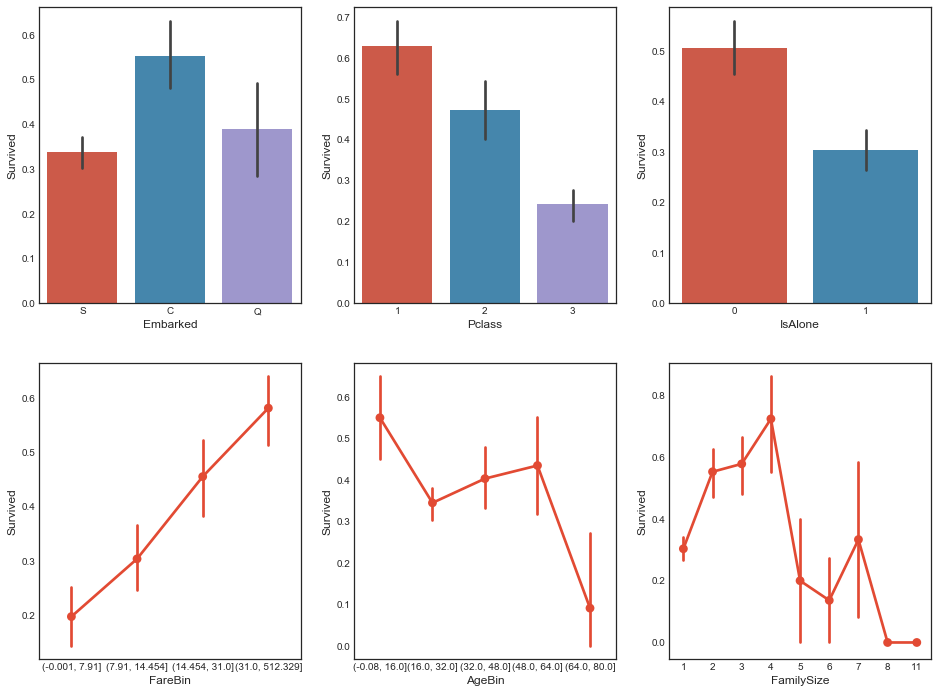

In [12]:
# categoricalのsurvivedとの相関を見てる?
# Embarked, Pclass, IsAlone'
fig, saxis = plt.subplots(2, 3, figsize=(16, 12))

sns.barplot(x = 'Embarked', y = 'Survived', data=data1, ax = saxis[0, 0])
sns.barplot(x = 'Pclass', y = 'Survived', data=data1, ax = saxis[0, 1])
sns.barplot(x = 'IsAlone', y = 'Survived', data=data1, ax = saxis[0, 2])

sns.pointplot(x = 'FareBin', y = 'Survived', data=data1, ax = saxis[1, 0])
sns.pointplot(x = 'AgeBin', y = 'Survived', data=data1, ax = saxis[1, 1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=data1, ax = saxis[1, 2])



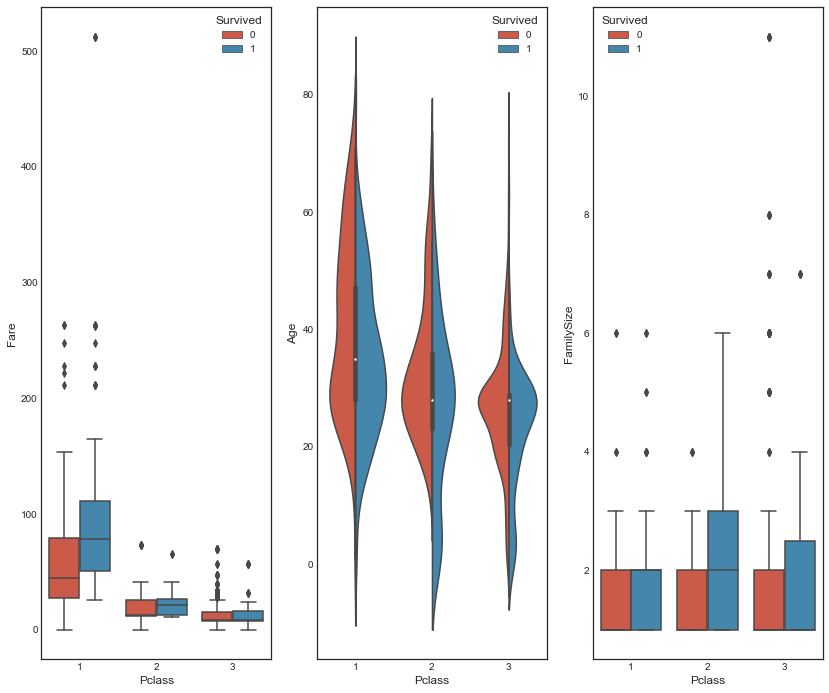

In [13]:
# numerical、categorical2つの特徴量を使って、survivedとの関係をみる
# categoricalは今回はPclass
# numericalは Fare、Age、FamilySize
# hueを使うとカテゴリごとに色分けされる。
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize = (14, 12))
sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = axis1 )
sns.title = ('Pclass vs Fare Survival Comparison')

# violinplotって要するに、横にヒストグラム書いて頂点を繋げてくれてるだけでしょ
# split=Trueにすると、左右分割でhueの違うものを書き、Falseだと左右で個別に書く
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1
               , split = True, ax = axis2 )
sns.title = ('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y = 'FamilySize', hue = 'Survived', data = data1, ax = axis3 )
sns.title = ('Pclass vs FamilySize Survival Comparison')


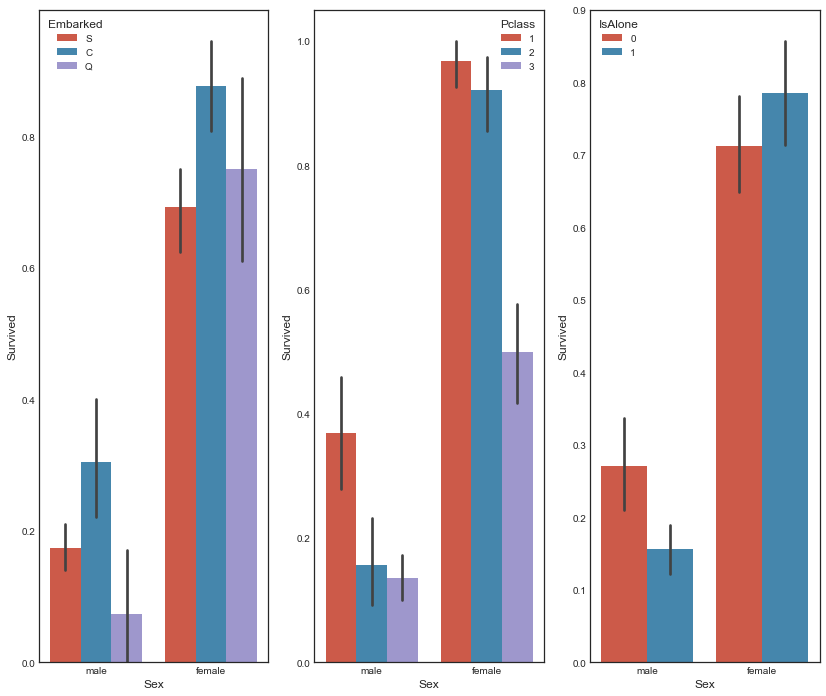

In [14]:
#graph distribution of qualitative data: Sex
fig, qaxis = plt.subplots(1, 3, figsize = (14, 12))
# 生き残った人がどこにたどり着いたか、性別で分けて見てる。
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data = data1, ax = qaxis[0] )
sns.title = ('Sex vs Embarked Survival Comparison')
# 生き残った人がどのクラスか、性別で分けて見てる。
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = data1, ax = qaxis[1] )
sns.title = ('Sex vs Pclass Survival Comparison')

# 生き残った人が独り身か、性別で分けて見てる。
sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data = data1, ax = qaxis[2] )
sns.title = ('Sex vs IsAlone Survival Comparison')

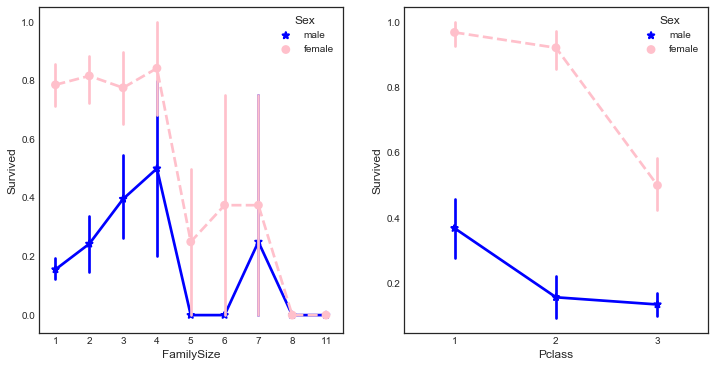

In [15]:
# 軸変えて見る
fig, (maxis1,  maxis2) = plt.subplots(1, 2, figsize=(12, 6))

sns.pointplot(x = 'FamilySize', y = 'Survived', hue = 'Sex', data = data1
             , palette = {'male':'blue', 'female':'pink'}
              , markers = ['*', 'o'], linestyles = ['-', '--'], ax = maxis1)

sns.pointplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = data1
             , palette = {'male':'blue', 'female':'pink'}
              , markers = ['*', 'o'], linestyles = ['-', '--'], ax = maxis2)


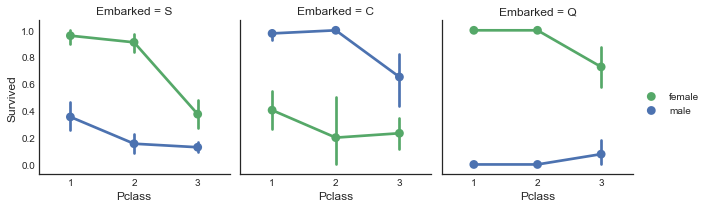

In [16]:
# FacetGridはカテゴリかる変数ごとにグラフを自動的に書いてくれるらしい
e = sns.FacetGrid(data1, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()

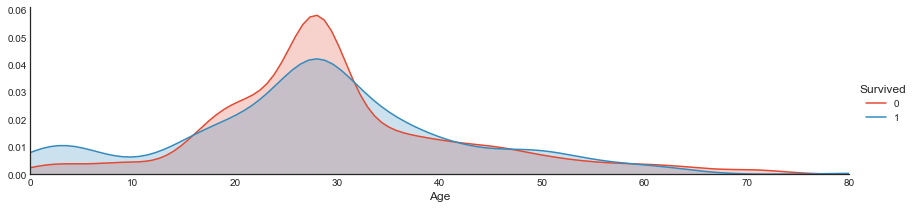

In [17]:
# plot distributions of age of passengers who survived or did not survive
# https://qiita.com/kibinag0/items/87c5d4d08fdc3ad0e9b4
# hue：変数を比較した上で、それぞれのラベルについて色分けして比較できる
# col：列ごとにグラフを分けて比較
a = sns.FacetGrid(data1, hue = 'Survived', aspect = 4 )
a.map(sns.kdeplot, 'Age', shade = True)
a.set(xlim = (0, data1['Age'].max()))
a.add_legend()

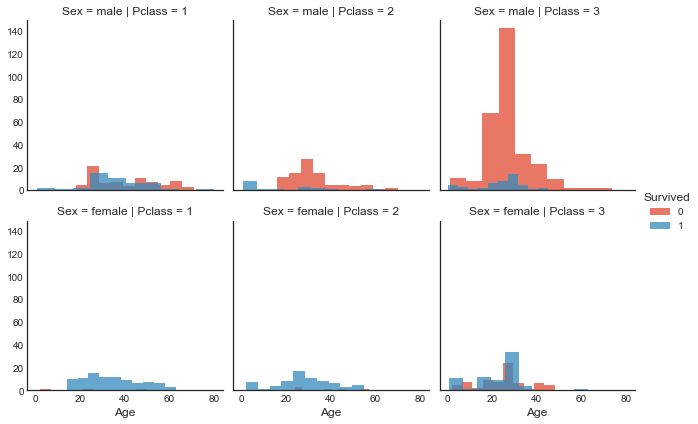

In [18]:
# SexとPclassの組み合わせごとにSurvivedのヒストグラムがどう変わるかを見る
# rowを指定すると、行ごとに分けれる
h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
# https://qiita.com/kibinag0/items/87c5d4d08fdc3ad0e9b4
# alphaは透過率を制御してくれる・
h.add_legend()
# sns.barplotだとなんか横向きに出力されて変な感じ


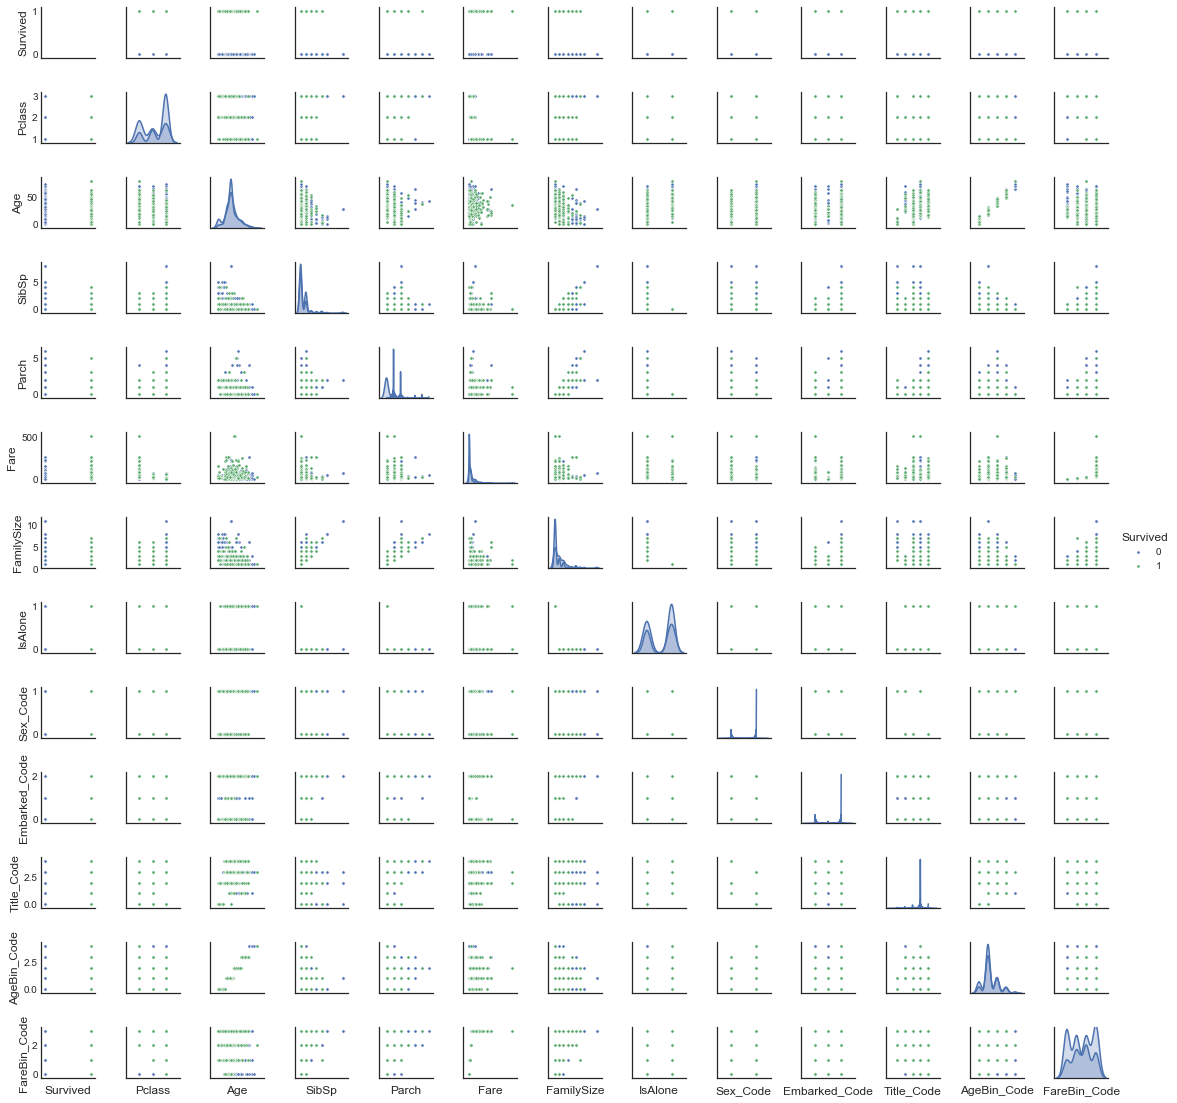

In [19]:
# 散布図行列を書いて見る
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
# https://qiita.com/kenmikamin/items/b018f4618db067c3d51c
# https://note.nkmk.me/python-seaborn-pandas-pairplot/
# diag_kws = 'kde'とすると、対角成分にカーネル密度推定による密度関数を描画する。
# 
pp = sns.pairplot(data1, hue = 'Survived', palette = 'deep', size = 1.2, diag_kind = 'kde'
                 , diag_kws = dict(shade = True), plot_kws=dict(s=10))
# diag_kws, plot_kwsは、matplotlibのhist()やscatter()の引数を指定できる.
# matplotlib.pyplot.scatter — Matplotlib 2.2.2 documentation
# matplotlib.pyplot.hist — Matplotlib 2.2.2 documentation
# sは点の大きさを表す
pp.set(xticklabels = [])
# https://vaaaaaanquish.hatenablog.com/entry/2017/10/29/181949
# カーネル密度推定は、標本から密度関数を推定してるみたいですねえ。
# 要するに、対角線上では、各特徴量に関して、ヒストグラムを書いて、そこから
# 確率密度関数を推定してるらしい


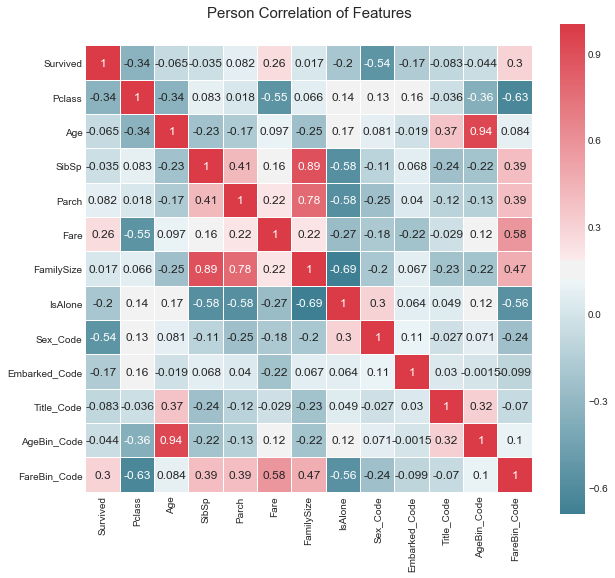

In [22]:
#correlation heatmap of dataset
# diverging_palette：パレットの種類：2色に分かれたカラーパレット
# cmapパラメータを持つグラフ描画で使えるように
# https://qiita.com/SaitoTsutomu/items/c79c9973a92e1e2c77a7
def correlation_heatmap(df):
    _, ax = plt.subplots(figsize = (10, 10))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(),
        cmap = colormap,
        square = True,  # Trueにすると、セルが正方形になるようchousei
        cbar_kws = {'shrink':.9},  # color-barのオプション
        ax=ax,
        annot=True,  # セルに値を出力今回だったら相関係数
        linewidths=0.1, vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12}  # Matplotlibのキーを指定
    )
    # https://pythondatascience.plavox.info/seaborn/heatmap
    # 
    plt.title('Person Correlation of Features', y=1.05, size=15)

    
correlation_heatmap(data1)

In [40]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods・・・実践機械学習に載ってる
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),  # ・・・実践機械学習に載ってる
    
    #Trees・・・実践機械学習に載ってる
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

# CrossValidation用にデータ分割
# http://aidiary.hatenablog.com/entry/20150826/1440596779
# ShuffleSplitは完全にデータをランダムで選ぶ
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6
                                        , random_state = 0)
# メトリクス比較用のテーブル作成
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean'
               , 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
print(MLA_compare)
print(cv_split)

Empty DataFrame
Columns: [MLA Name, MLA Parameters, MLA Train Accuracy Mean, MLA Test Accuracy Mean, MLA Test Accuracy 3*STD, MLA Time]
Index: []
ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6)


In [41]:
#  predict比較用のテーブルを作る(正解データの入力?)

MLA_predict = data1[Target]
# print(MLA_prediction)
# pandasで特定の位置のデータを変更したい時には.locを使う必要あり
# locを使わないと、新しい列が追加されてしまう。
# https://note.nkmk.me/python-pandas-at-iat-loc-iloc/
# cross_validateはcross_val_scoreの色々できる版
# http://vertica-tech.ashisuto.co.jp/cross_validation/
# https://qiita.com/_takoika/items/89a7e42dd0dc964d0e29
row_index = 0
for alg in MLA:
    
    MLA_name = alg.__class__.__name__
    # print(MLA_name)
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())  # 学習機で使われてるパラメータを返す
    
    # ここで、交差検証させて、学習性能を評価
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], 
                                              cv = cv_split)  # cvで分割の手法を指定してる
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
    
    # フルで学習させる
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index += 1
    

# pandasでsortするには、sort_valuesを使う必要がある。
# https://note.nkmk.me/python-pandas-sort-values-sort-index/
# 結果出力
# by：sorしたいラベル
# ascending：昇順、降順、inplaceすると、データ自体をいじれる
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean']
                        , ascending = False, inplace = True)
# print(MLA_compare) 
MLA_compare
# printすると一列ずつ書かれる


    
    

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.856367,0.829478,0.0527546,0.0208498
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.837266,0.826119,0.0453876,0.032399
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.891386,0.823881,0.0547936,0.0146081
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.835768,0.822761,0.0493681,0.0353519
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.866667,0.822015,0.0529916,0.0570934
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.891011,0.821269,0.0571773,0.0139154
17,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.820149,0.0581228,0.00144219
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.895131,0.819776,0.0664232,0.0123901
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.850375,0.813806,0.0690863,0.00147846
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.820412,0.81194,0.0498606,0.0735357


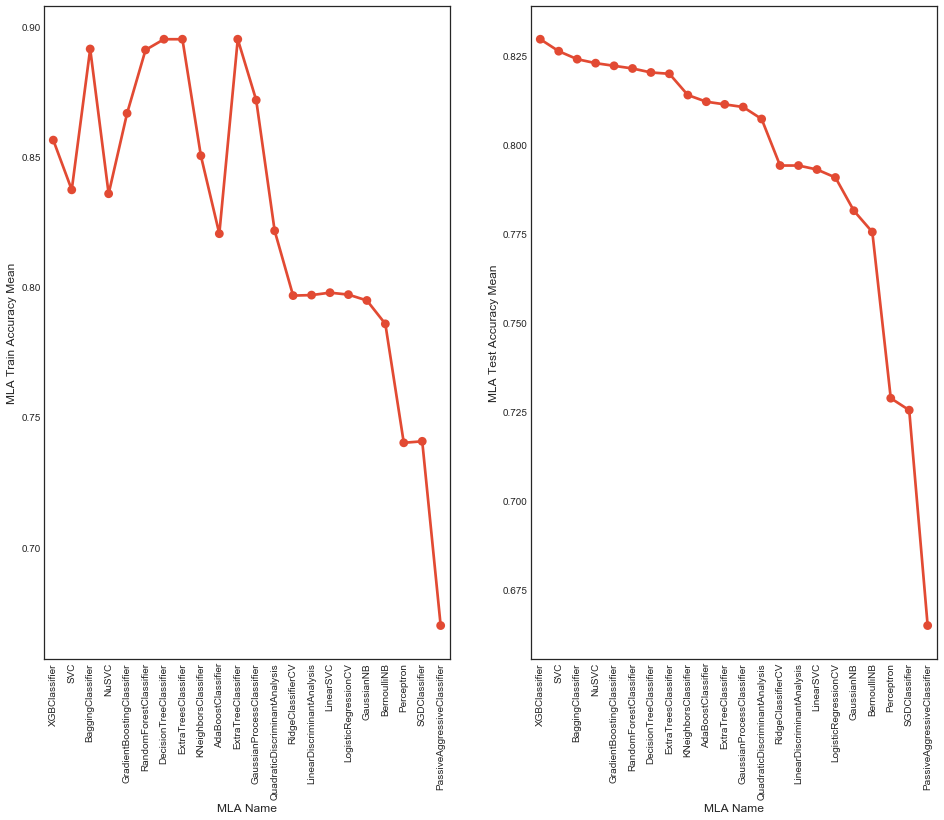

In [70]:
x_compare, qaxis = plt.subplots(1, 2,figsize=(16, 12))
xlabel = [_ for _ in MLA_compare['MLA Name']]
ax1 = sns.pointplot(x = 'MLA Name', y = 'MLA Train Accuracy Mean', data = MLA_compare, ax = qaxis[0])
ax1.set_xticklabels(xlabel, rotation='vertical')
ax2 = sns.pointplot(x = 'MLA Name', y = 'MLA Test Accuracy Mean', data = MLA_compare, ax = qaxis[1])
ax2.set_xticklabels(xlabel, rotation='vertical')

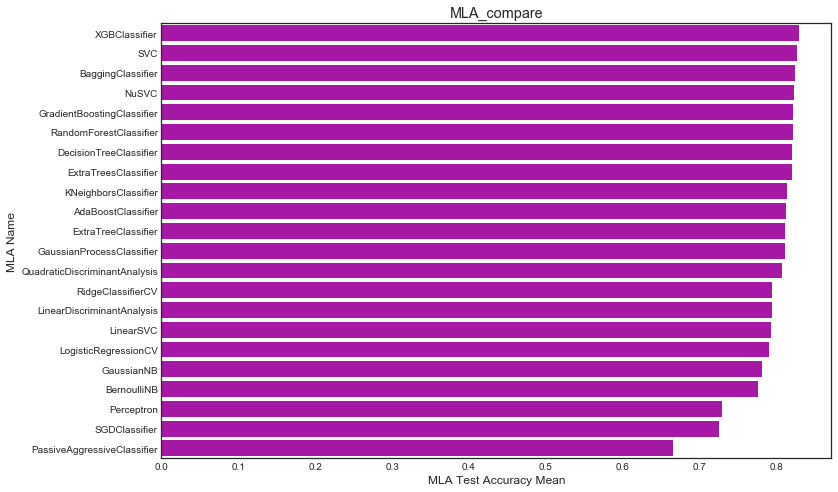

In [133]:
sns.barplot(x = 'MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')
plt.title('MLA_compare')

In [87]:
#print(type(data1))
for index, rows in data1.iterrows():
    # print(index, '\n', type(index), type(rows))
    if random.random() > .5:
        data1.set_value(index, 'Random_Predict', 1)
    else:
        data1.set_value(index, 'Random_Predict', 0)

In [89]:
data1['Random_Score'] = 0
data1.loc[data1['Survived'] == data1['Random_Predict'], 'Random_Score'] = 1
print('Coin flip model accuracy  score = {:.2f}%'.format(data1['Random_Score'].mean()*100))
# accuracy_scoreは第1種の過誤、第二種の過誤を考えて、正確さを出してる
print('Coin flip model accuracy score　w/scikit = {:.2f}%'.format(metrics.accuracy_score(data1['Survived'], data1['Random_Predict'])*100))

Coin flip model accuracy  score = 48.82%
Coin flip model accuracy score　w/scikit = 48.82%


In [100]:
# グループごとに、生き残りの平均だす。
pivot_female = data1[data1.Sex == 'female'].groupby(['Sex', 'Pclass', 'Embarked', 'FareBin'])['Survived'].mean()
# groupbyは引数はリスト
# femaleの場合
print('Survival Decision Tree female node \n', pivot_female)
pivot_male = data1[data1.Sex == 'male'].groupby(['Sex', 'Pclass', 'Embarked', 'FareBin'])['Survived'].mean()
# groupbyは引数はリスト
# femaleの場合
print('Survival Decision Tree female node \n', pivot_male)

Survival Decision Tree female node 
 Sex     Pclass  Embarked  FareBin        
female  1       C         (14.454, 31.0]     0.666667
                          (31.0, 512.329]    1.000000
                Q         (31.0, 512.329]    1.000000
                S         (14.454, 31.0]     1.000000
                          (31.0, 512.329]    0.955556
        2       C         (7.91, 14.454]     1.000000
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    1.000000
                Q         (7.91, 14.454]     1.000000
                S         (7.91, 14.454]     0.875000
                          (14.454, 31.0]     0.916667
                          (31.0, 512.329]    1.000000
        3       C         (-0.001, 7.91]     1.000000
                          (7.91, 14.454]     0.428571
                          (14.454, 31.0]     0.666667
                Q         (-0.001, 7.91]     0.750000
                          (7.91, 14.454]     0.500000
   

In [102]:
pivot_male = data1[data1.Sex == 'male'].groupby(['Sex', 'Title'])['Survived'].mean()
# groupbyは引数はリスト
# femaleの場合
print('Survival Decision Tree male node \n', pivot_male)

Survival Decision Tree male node 
 Sex   Title 
male  Master    0.575000
      Misc      0.250000
      Mr        0.156673
Name: Survived, dtype: float64


In [103]:
print(data1[data1.Sex == 'female'].groupby(['Sex', 
                                                 'Pclass'])['Survived'].mean())

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
Name: Survived, dtype: float64


In [104]:
print(data1[data1.Sex == 'female'].groupby(['Sex', 
                                                 'Embarked'])['Survived'].mean())

Sex     Embarked
female  C           0.876712
        Q           0.750000
        S           0.692683
Name: Survived, dtype: float64


In [105]:
print(data1[data1.Sex == 'female'].groupby(['Sex', 
                                                 'FareBin'])['Survived'].mean())

Sex     FareBin        
female  (-0.001, 7.91]     0.697674
        (7.91, 14.454]     0.641791
        (14.454, 31.0]     0.698925
        (31.0, 512.329]    0.855856
Name: Survived, dtype: float64


In [128]:
#  学習器とか使わずに作ったやつ
def mytree(df):
    
    Model = pd.DataFrame(data = {'Predict':[]})
    # data=とすると、データを入れれる。その時、columnだけ入れることも可能に
    male_title = ['Master']
    for index, row in df.iterrows():
  
        # Q1 Were you on the titanic 
        Model.loc[index, 'Predict'] = 0

        # Q2 Are you female almost female Survived
        if df.loc[index, 'Sex'] == 'female':
            Model.loc[index, 'Predict'] = 1
        
        #  Q3 Pclass, Embarkedにはあんま寄らず生き残ってる？Pclassは生き残ってる気が
        # Q5 特殊な場合？
        if ((df.loc[index, 'Sex'] == 'female') & 
            (df.loc[index, 'Pclass'] == 3) & 
            (df.loc[index, 'Embarked'] == 'S')  &
            (df.loc[index, 'Fare'] > 8)

           ):
            Model.loc[index, 'Predict'] = 0
            
        if (df.loc[index, 'Sex'] == 'male') & (df.loc[index, 'Title'] == 'Master'):
            Model.loc[index, 'Predict'] = 1
    return Model

In [131]:
Tree_Predict = mytree(data1)
# print(Tree_Predict)
print('Dicision Tree accuracy score{:.2f}%\n'.format
      (metrics.accuracy_score(data1['Survived'], Tree_Predict)*100))

Dicision Tree accuracy score82.04%



In [132]:
print(metrics.classification_report(data1['Survived'], Tree_Predict))

             precision    recall  f1-score   support

          0       0.82      0.91      0.86       549
          1       0.82      0.68      0.75       342

avg / total       0.82      0.82      0.82       891



In [139]:
dtree = tree.DecisionTreeClassifier(random_state = 0)
base_results = model_selection.cross_validate(dtree, data1[data1_x_bin], data1[Target]
                                             , cv = cv_split)
dtree.fit(data1[data1_x_bin], data1[Target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [140]:
print('BEFORE DT Parameters: ', dtree.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))

BEFORE DT Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 89.51
BEFORE DT Test w/bin score mean: 82.09
BEFORE DT Test w/bin score 3*std: +/- 5.57


In [141]:
param_grid = {'criterion': ['gini', 'entropy'],'max_depth': [2,4,6,8,10,None]
              ,'random_state': [0]}

In [148]:
tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier()
                                        , param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
tune_model.fit(data1[data1_x_bin], data1[Target])

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 10, None], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [149]:
print('AFTER DT Parameters: ', tune_model.best_params_)
#print(tune_model.cv_results_['mean_train_score'])
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(tune_model.cv_results_['mean_test_score'])
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)


AFTER DT Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT Training w/bin score mean: 89.35
AFTER DT Test w/bin score mean: 87.40
AFTER DT Test w/bin score 3*std: +/- 5.00
----------


In [151]:
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))

BEFORE DT Training w/bin score mean: 89.51
BEFORE DT Test w/bin score mean: 82.09
BEFORE DT Test w/bin score 3*std: +/- 5.57


In [153]:
print('GrieSearchCV・・・・目的＝ハイパーパラメータの最適化')
print('RFE・・・目的＝ハイパーパラメータの選別')

GrieSearchCV・・・・目的＝ハイパーパラメータの最適化
RFE・・・目的＝ハイパーパラメータの選別


In [154]:
# 選別(RFEを用いた)前
print('Before DT RFE Train Shape Old:', data1[data1_x_bin].shape)
print('Before DT RFE Train Columns Old:', data1[data1_x_bin].columns.values)

print('BEFORE DT RFE Training w/bin score mean: {:.2f}%'
      .format(base_result['train_score'].mean()*100))
print('BEFORE DT RFE Test w/bin score mean: {:.2f}%'
      .format(base_result['test_score'].mean()*100))
print('BEFORE DT RFE Test w/bin score std:+/- {:.2f}%'
      .format(base_result['test_score'].std()*100*3))


Before DT RFE Train Shape Old: (891, 7)
Before DT RFE Train Columns Old: ['Sex_Code' 'Pclass' 'Embarked_Code' 'Title_Code' 'FamilySize'
 'AgeBin_Code' 'FareBin_Code']
BEFORE DT RFE Training w/bin score mean: 89.51%
BEFORE DT RFE Test w/bin score mean: 82.09%
BEFORE DT RFE Test w/bin score std:+/- 5.57%


In [157]:
# featur selection
dtree_rfe = feature_selection.RFECV(dtree, step = 1, scoring = 'accuracy', cv = cv_split)
dtree_rfe.fit(data1[data1_x_bin], data1[Target])

RFECV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6),
   estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [158]:
print(type(dtree_rfe))

<class 'sklearn.feature_selection.rfe.RFECV'>


In [159]:
print(dtree_rfe)

RFECV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6),
   estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)


In [161]:
X_rfe = data1[data1_x_bin].columns.values[dtree_rfe.get_support()]
# 選択された特徴量の記録
# valuesはarrayとして、入ってる値を取得

In [168]:
dtree_rfe.get_support()
# 各特徴量を選択したか否かのmaskを取得
# get_supportで値を使うか使わないかがlistとして取得できるらしい。それを入れると、なんか取得できる

array([ True,  True, False,  True,  True,  True,  True], dtype=bool)

In [165]:
print(data1[data1_x_bin].columns)

Index(['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize',
       'AgeBin_Code', 'FareBin_Code'],
      dtype='object')


In [167]:
print(data1[data1_x_bin].columns.values)

['Sex_Code' 'Pclass' 'Embarked_Code' 'Title_Code' 'FamilySize'
 'AgeBin_Code' 'FareBin_Code']


In [166]:
print(data1[data1_x_bin])

     Sex_Code  Pclass  Embarked_Code  Title_Code  FamilySize  AgeBin_Code  \
0           1       3              2           3           2            1   
1           0       1              0           4           2            2   
2           0       3              2           2           1            1   
3           0       1              2           4           2            2   
4           1       3              2           3           1            2   
5           1       3              1           3           1            1   
6           1       1              2           3           1            3   
7           1       3              2           0           5            0   
8           0       3              2           4           3            1   
9           0       2              0           4           2            0   
10          0       3              2           2           3            0   
11          0       1              2           2           1            3   

In [164]:
print(data1_x_bin)

['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']


In [163]:
print(X_rfe)

['Sex_Code' 'Pclass' 'Title_Code' 'FamilySize' 'AgeBin_Code' 'FareBin_Code']


In [170]:
# 特徴量を絞った上でdtreeでcross_validationして、精度を記録
rfe_results = model_selection.cross_validate(dtree, data1[X_rfe], data1[Target]
                                               , cv = cv_split)

In [174]:
# 選別(RFEを用いた)前
print('Before DT RFE Train Shape Old:', data1[data1_x_bin].shape)
print('Before DT RFE Train Columns Old:', data1[data1_x_bin].columns.values)

print('BEFORE DT RFE Training w/bin score mean: {:.2f}%'
      .format(base_result['train_score'].mean()*100))
print('BEFORE DT RFE Test w/bin score mean: {:.2f}%'
      .format(base_result['test_score'].mean()*100))
print('BEFORE DT RFE Test w/bin score std:+/- {:.2f}%'
      .format(base_result['test_score'].std()*100*3))

Before DT RFE Train Shape Old: (891, 7)
Before DT RFE Train Columns Old: ['Sex_Code' 'Pclass' 'Embarked_Code' 'Title_Code' 'FamilySize'
 'AgeBin_Code' 'FareBin_Code']
BEFORE DT RFE Training w/bin score mean: 89.51%
BEFORE DT RFE Test w/bin score mean: 82.09%
BEFORE DT RFE Test w/bin score std:+/- 5.57%


In [172]:
print('After DT RFE Train Shape Old:', data1[X_rfe].shape)
print('After DT RFE Train Columns Old:', data1[X_rfe].columns.values)

print('After DT RFE Training w/bin score mean: {:.2f}%'
      .format(rfe_results['train_score'].mean()*100))
print('After DT RFE Test w/bin score mean: {:.2f}%'
      .format(rfe_results['test_score'].mean()*100))
print('After DT RFE Test w/bin score std:+/- {:.2f}%'
      .format(rfe_results['test_score'].std()*100*3))

After DT RFE Train Shape Old: (891, 6)
After DT RFE Train Columns Old: ['Sex_Code' 'Pclass' 'Title_Code' 'FamilySize' 'AgeBin_Code' 'FareBin_Code']
After DT RFE Training w/bin score mean: 88.16%
After DT RFE Test w/bin score mean: 83.06%
After DT RFE Test w/bin score std:+/- 6.22%


In [175]:
rfe_tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier()
                                              , param_grid = param_grid, scoring = 'roc_auc', cv = cv_split)

In [176]:
rfe_tune_model.fit(data1[X_rfe], data1[Target])

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 10, None], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [177]:
# 選別(RFEを用いた)前
print('Before DT RFE Train Shape Old:', data1[data1_x_bin].shape)
print('Before DT RFE Train Columns Old:', data1[data1_x_bin].columns.values)

print('BEFORE DT RFE Training w/bin score mean: {:.2f}%'
      .format(base_result['train_score'].mean()*100))
print('BEFORE DT RFE Test w/bin score mean: {:.2f}%'
      .format(base_result['test_score'].mean()*100))
print('BEFORE DT RFE Test w/bin score std:+/- {:.2f}%'
      .format(base_result['test_score'].std()*100*3))

Before DT RFE Train Shape Old: (891, 7)
Before DT RFE Train Columns Old: ['Sex_Code' 'Pclass' 'Embarked_Code' 'Title_Code' 'FamilySize'
 'AgeBin_Code' 'FareBin_Code']
BEFORE DT RFE Training w/bin score mean: 89.51%
BEFORE DT RFE Test w/bin score mean: 82.09%
BEFORE DT RFE Test w/bin score std:+/- 5.57%


In [178]:
print('After DT RFE Train Shape Old:', data1[X_rfe].shape)
print('After DT RFE Train Columns Old:', data1[X_rfe].columns.values)

print('After DT RFE Training w/bin score mean: {:.2f}%'
      .format(rfe_results['train_score'].mean()*100))
print('After DT RFE Test w/bin score mean: {:.2f}%'
      .format(rfe_results['test_score'].mean()*100))
print('After DT RFE Test w/bin score std:+/- {:.2f}%'
      .format(rfe_results['test_score'].std()*100*3))

After DT RFE Train Shape Old: (891, 6)
After DT RFE Train Columns Old: ['Sex_Code' 'Pclass' 'Title_Code' 'FamilySize' 'AgeBin_Code' 'FareBin_Code']
After DT RFE Training w/bin score mean: 88.16%
After DT RFE Test w/bin score mean: 83.06%
After DT RFE Test w/bin score std:+/- 6.22%


In [179]:
print('AFTER DT RFE Tuned Parameters: ', rfe_tune_model.best_params_)
#print(rfe_tune_model.cv_results_['mean_train_score'])
print("AFTER DT RFE Tuned Training w/bin score mean: {:.2f}"
      . format(rfe_tune_model.cv_results_['mean_train_score']
               [tune_model.best_index_]*100)) 
#print(rfe_tune_model.cv_results_['mean_test_score'])
print("AFTER DT RFE Tuned Test w/bin score mean: {:.2f}"
      . format(rfe_tune_model.cv_results_['mean_test_score']
               [tune_model.best_index_]*100))
print("AFTER DT RFE Tuned Test w/bin score 3*std: +/- {:.2f}"
      . format(rfe_tune_model.cv_results_['std_test_score']
               [tune_model.best_index_]*100*3))
print('-'*10)

AFTER DT RFE Tuned Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT RFE Tuned Training w/bin score mean: 89.39
AFTER DT RFE Tuned Test w/bin score mean: 87.34
AFTER DT RFE Tuned Test w/bin score 3*std: +/- 6.21
----------


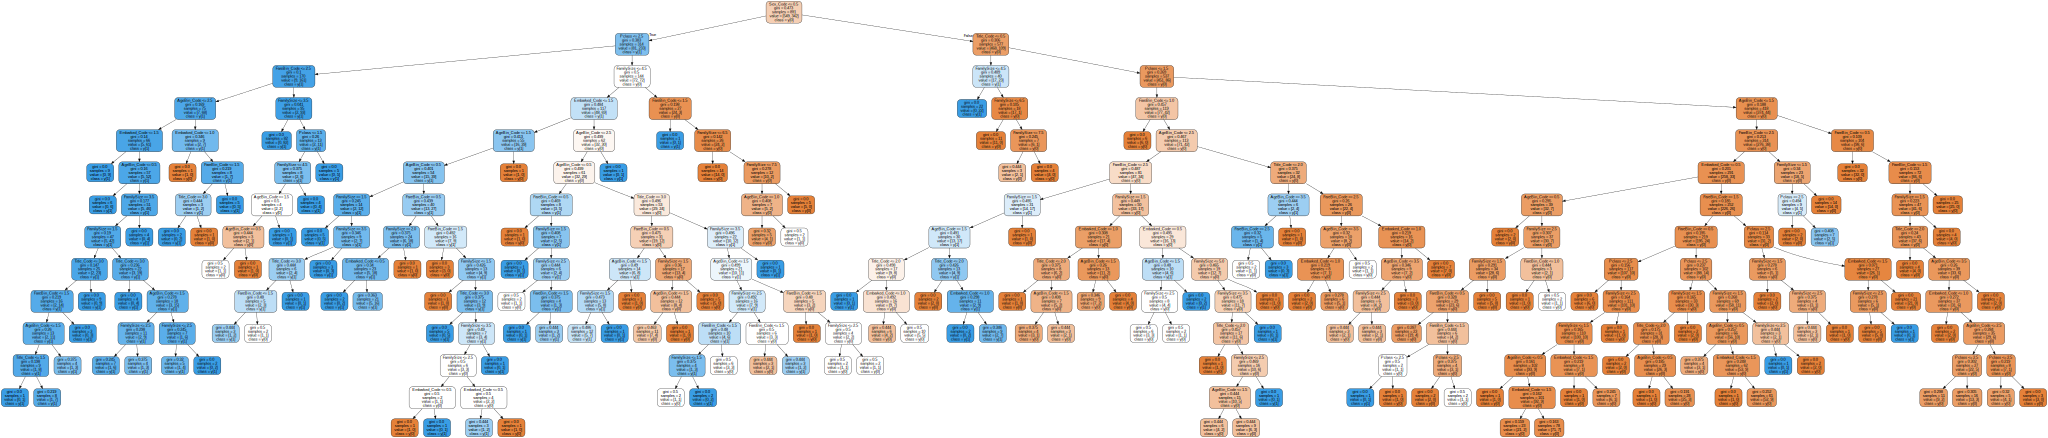

In [180]:
import graphviz 
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names = data1_x_bin, class_names = True,
                                filled = True, rounded = True)
graph = graphviz.Source(dot_data) 
graph

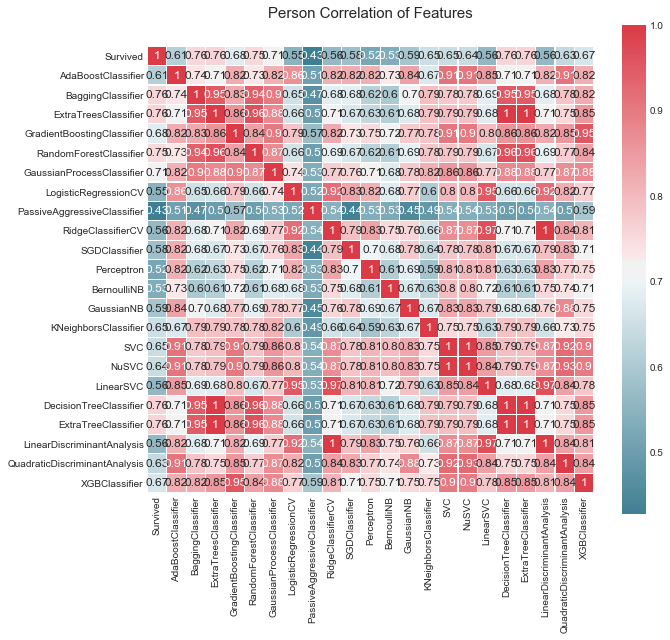

In [181]:
#compare algorithm predictions with each other, where 1 = exactly similar and 0 = exactly opposite
#there are some 1's, but enough blues and light reds to create a "super algorithm" by combining them
correlation_heatmap(MLA_predict)

In [182]:
vote_est = [
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    ('lr', linear_model.LogisticRegressionCV()),
    
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    
    ('knn', neighbors.KNeighborsClassifier()),
    
    ('svc', svm.SVC(probability=True)),
    
   ('xgb', XGBClassifier())

]

In [ ]:
print("VotingClassifierは学習機の出した結果を多数決もしくは確率平均で決める。")

In [186]:
vote_hard = ensemble.VotingClassifier(estimators = vote_est, voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, data1[data1_x_bin], data1[Target]
                              , cv = cv_split)
vote_hard.fit(data1[data1_x_bin], data1[Target])

VotingClassifier(estimators=[('ada', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)), ('bc', BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimator...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [187]:
print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting Training w/bin score mean: 86.59
Hard Voting Test w/bin score mean: 82.54
Hard Voting Test w/bin score 3*std: +/- 4.50
----------


In [189]:
#Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators = vote_est, voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, data1[data1_x_bin], data1[Target], cv  = cv_split)
vote_soft.fit(data1[data1_x_bin], data1[Target])

VotingClassifier(estimators=[('ada', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)), ('bc', BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimator...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [190]:
print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

Soft Voting Training w/bin score mean: 87.38
Soft Voting Test w/bin score mean: 82.39
Soft Voting Test w/bin score 3*std: +/- 3.74
----------


In [191]:
#WARNING: Running is very computational intensive and time expensive.
#WARNING: Running is very computational intensive and time expensive.
#Code is written for experimental/developmental purposes and not production ready!


#Hyperparameter Tune with GridSearchCV: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]


grid_param = [
            [{
            #AdaBoostClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
            'n_estimators': grid_n_estimator, #default=50
            'learning_rate': grid_learn, #default=1
            #'algorithm': ['SAMME', 'SAMME.R'], #default=’SAMME.R
            'random_state': grid_seed
            }],
       
    
            [{
            #BaggingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
            'n_estimators': grid_n_estimator, #default=10
            'max_samples': grid_ratio, #default=1.0
            'random_state': grid_seed
             }],

    
            [{
            #ExtraTreesClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'random_state': grid_seed
             }],


            [{
            #GradientBoostingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
            #'loss': ['deviance', 'exponential'], #default=’deviance’
            'learning_rate': [.05], #default=0.1 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            'n_estimators': [300], #default=100 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            #'criterion': ['friedman_mse', 'mse', 'mae'], #default=”friedman_mse”
            'max_depth': grid_max_depth, #default=3   
            'random_state': grid_seed
             }],

    
            [{
            #RandomForestClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'oob_score': [True], #default=False -- 12/31/17 set to reduce runtime -- The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 146.35 seconds.
            'random_state': grid_seed
             }],
    
            [{    
            #GaussianProcessClassifier
            'max_iter_predict': grid_n_estimator, #default: 100
            'random_state': grid_seed
            }],
        
    
            [{
            #LogisticRegressionCV - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
            'fit_intercept': grid_bool, #default: True
            #'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': grid_seed
             }],
            
    
            [{
            #BernoulliNB - http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
            'alpha': grid_ratio, #default: 1.0
             }],
    
    
            #GaussianNB - 
            [{}],
    
            [{
            #KNeighborsClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
            'n_neighbors': [1,2,3,4,5,6,7], #default: 5
            'weights': ['uniform', 'distance'], #default = ‘uniform’
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }],
            
    
            [{
            #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
            #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
            #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [1,2,3,4,5], #default=1.0
            'gamma': grid_ratio, #edfault: auto
            'decision_function_shape': ['ovo', 'ovr'], #default:ovr
            'probability': [True],
            'random_state': grid_seed
             }],

    
            [{
            #XGBClassifier - http://xgboost.readthedocs.io/en/latest/parameter.html
            'learning_rate': grid_learn, #default: .3
            'max_depth': [1,2,4,6,8,10], #default 2
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }]   
        ]



start_total = time.perf_counter() #https://docs.python.org/3/library/time.html#time.perf_counter
for clf, param in zip (vote_est, grid_param): #https://docs.python.org/3/library/functions.html#zip


    start = time.perf_counter()        
    best_search = model_selection.GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'roc_auc')
    best_search.fit(data1[data1_x_bin], data1[Target])
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param) 


run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

print('-'*10)

The best parameter for AdaBoostClassifier is {'learning_rate': 0.1, 'n_estimators': 300, 'random_state': 0} with a runtime of 42.08 seconds.
The best parameter for BaggingClassifier is {'max_samples': 0.25, 'n_estimators': 300, 'random_state': 0} with a runtime of 35.08 seconds.
The best parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0} with a runtime of 72.67 seconds.
The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 37.19 seconds.
The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 89.33 seconds.
The best parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with a runtime of 78.87 seconds.
The best parameter for LogisticRegressionCV is {'fit_intercept': True, 'random_sta

In [192]:
#Hard Vote or majority rules w/Tuned Hyperparameters
grid_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, data1[data1_x_bin], data1[Target], cv  = cv_split)
grid_hard.fit(data1[data1_x_bin], data1[Target])

print("Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*10)

#Soft Vote or weighted probabilities w/Tuned Hyperparameters
grid_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, data1[data1_x_bin], data1[Target], cv  = cv_split)
grid_soft.fit(data1[data1_x_bin], data1[Target])

print("Soft Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting w/Tuned Hyperparameters Training w/bin score mean: 85.22
Hard Voting w/Tuned Hyperparameters Test w/bin score mean: 82.31
Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 5.26
----------
Soft Voting w/Tuned Hyperparameters Training w/bin score mean: 84.78
Soft Voting w/Tuned Hyperparameters Test w/bin score mean: 82.24
Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 5.40
----------


In [193]:
print(data_val.info())
print("-"*10)
#data_val.sample(10)



#handmade decision tree - submission score = 0.77990
data_val['Survived'] = mytree(data_val).astype(int)
data_val['Survived'] = grid_hard.predict(data_val[data1_x_bin])


#soft voting classifier w/full dataset modeling submission score: defaults= 0.73684, tuned = 0.74162
#data_val['Survived'] = vote_soft.predict(data_val[data1_x_bin])
#data_val['Survived'] = grid_soft.predict(data_val[data1_x_bin])


#submit file
submit = data_val[['PassengerId','Survived']]
submit.to_csv("../submit/submit.csv", index=False)
# to_csvでcsvに書き出せるよ。

print('Validation Data Distribution: \n', data_val['Survived'].value_counts(normalize = True))
submit.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
PassengerId      418 non-null int64
Pclass           418 non-null int64
Name             418 non-null object
Sex              418 non-null object
Age              418 non-null float64
SibSp            418 non-null int64
Parch            418 non-null int64
Ticket           418 non-null object
Fare             418 non-null float64
Cabin            91 non-null object
Embarked         418 non-null object
FamilySize       418 non-null int64
IsAlone          418 non-null int64
Title            418 non-null object
FareBin          418 non-null category
AgeBin           418 non-null category
Sex_Code         418 non-null int64
Embarked_Code    418 non-null int64
Title_Code       418 non-null int64
AgeBin_Code      418 non-null int64
FareBin_Code     418 non-null int64
dtypes: category(2), float64(2), int64(11), object(6)
memory usage: 63.1+ KB
None
----------
Validation Data Distribution: 


,PassengerId,Survived
144,1036,0
23,915,0
179,1071,1
294,1186,0
209,1101,0
363,1255,0
392,1284,0
256,1148,0
116,1008,0
402,1294,1
